In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
k_data = pd.read_csv("kaggle_data.csv")

In [69]:
k_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [70]:
k_data.shape

(7043, 21)

## data preprocessing

In [71]:
# chekcing the na data

# all of the data has value

k_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [72]:
k_data.groupby('Churn')[['MonthlyCharges', 'tenure' ]].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

In [73]:
# TotalCharges (object type) -> numeric type

# Totalcharges composed with numerical value. 
# but empty values are represented as object value.
# so preprocessing the data with np.nan.



k_data[k_data['TotalCharges'] == ' '] 

k_data['TotalCharges'] =  k_data['TotalCharges'].replace(' ', np.nan)

# there are 11 empty values

k_data['TotalCharges'].isna().sum()

# to_numeric()
k_data['TotalCharges'] = pd.to_numeric(k_data['TotalCharges'])



In [74]:
k_data['TotalCharges'].dtypes

dtype('float64')

In [75]:
k_data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges' ]].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

In [76]:
# drop the na value ( 11 )

k_data.dropna(inplace = True)


In [77]:
# according to this process, total data shirinking 7043 to 7032

k_data.isna().sum()
print(k_data.shape)

(7032, 21)


In [78]:
k_data.groupby('Churn')[['OnlineSecurity', 'OnlineBackup', 'PhoneService']].count()

,OnlineSecurity,OnlineBackup,PhoneService
Churn,,,
No,5163,5163,5163
Yes,1869,1869,1869


In [79]:
# correlation 

# Churn data's type is object. So we need to change object data type to numerical data type


def convert(data):
    
    if data == "Yes":
        return 1
    else:
        return 0

k_data['Churn(clean)'] = k_data['Churn'].apply(convert)

In [80]:
k_data.head()    
        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn(clean)
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [81]:
corr = k_data.corr('pearson')

In [82]:
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn(clean)
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn(clean),0.150541,-0.354049,0.192858,-0.199484,1.000000


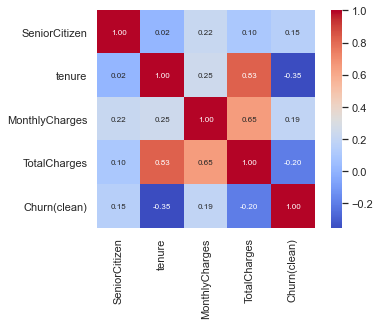

In [83]:
data_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 8}, fmt = '.2f', square = True, cmap = 'coolwarm')



In [84]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

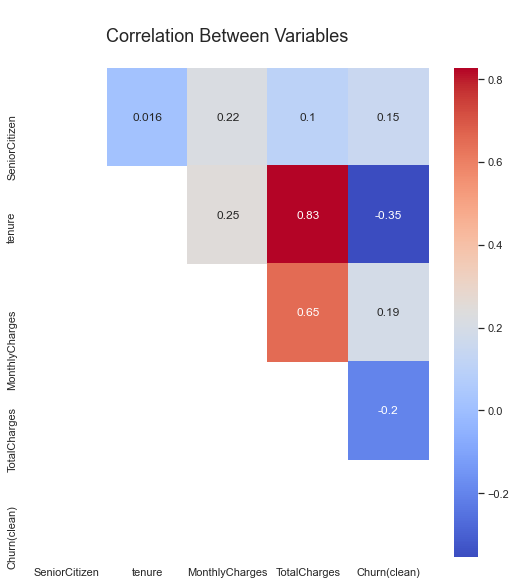

In [85]:
half_corr_heatmap(k_data, 'Correlation Between Variables')

In [86]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, )
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

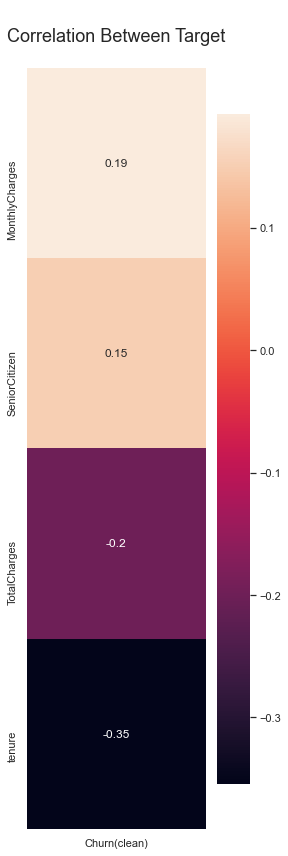

In [87]:
corr_for_target(k_data, 'Churn(clean)', 'Correlation Between Target')

In [88]:
k_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn(clean)
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [89]:
data = k_data

In [90]:
data2 = k_data.drop(['customerID'], axis=1)


In [91]:
data = data.drop(['customerID', 'Churn'], axis=1)

In [92]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn(clean)
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [93]:
numerical = data.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data.columns.difference(numerical)

data2[categorical] = data[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn(clean)'],
      dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


In [94]:
data = pd.get_dummies(data)

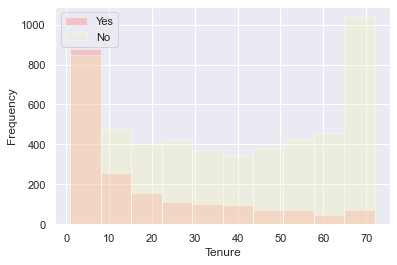

In [95]:
k_data[k_data['Churn(clean)'] == 1].tenure.plot(kind = 'hist', alpha = 0.4, color = '#FF8A80', label = 'Yes')

k_data[k_data['Churn(clean)'] == 0].tenure.plot(kind = 'hist', alpha = 0.4, color = '#F0F4C3', label = 'No')

plt.xlabel('Tenure')
plt.legend();

In [96]:
sns.countplot('OnlineSecurity', data = data, hue = 'Churn', palette='Paired');

ValueError: Could not interpret input 'OnlineSecurity'

In [97]:
sns.countplot('Contract', data = data, palette='Paired', hue = 'Churn');

ValueError: Could not interpret input 'Contract'

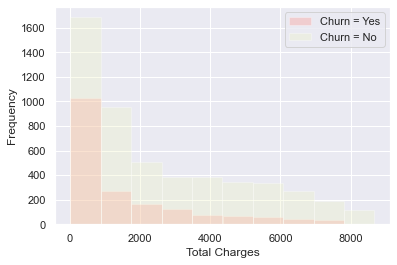

In [98]:
k_data[k_data['Churn(clean)'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')

k_data[k_data['Churn(clean)'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();

### split data

In [99]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn(clean)', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contr

In [100]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn(clean),gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [101]:
X = data.drop('Churn(clean)', axis=1)

y = data['Churn(clean)']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 20121658)

In [105]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

In [106]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.7885325067890857
Mean of the KNN model scores : 0.7609496233673865
Mean of the Decision Tree Clas. model scores : 0.7238341361696625
Mean of the GBC model scores : 0.8071673347989139
Mean of the Logistic Reg. model scores : 0.8047503394542869
[14:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

### logistic regression

In [107]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [108]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [109]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.804739336492891
Accuracy score for train data : 0.8041446566436408


In [110]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1662
           1       0.53      0.63      0.58       448

    accuracy                           0.80      2110
   macro avg       0.71      0.74      0.73      2110
weighted avg       0.82      0.80      0.81      2110



In [111]:
metrics.confusion_matrix(log_y_pred, y_test)

array([[1414,  248],
       [ 164,  284]], dtype=int64)

In [112]:
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[3201,  580],
       [ 384,  757]], dtype=int64)

In [113]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

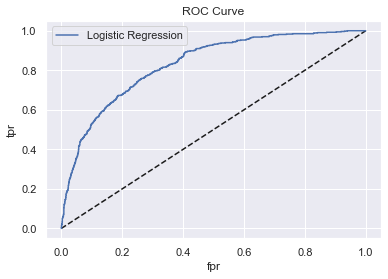

In [114]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [115]:
metrics.roc_auc_score(y_test, y_proba_log)

0.829654935818634

In [116]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8506844670878932

### SVC (Support vector Classifier (SVM) )

In [117]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [118]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [119]:
# overfitting issue

print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.747867298578199
Accuracy score for train data : 0.7283624542868753


In [120]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1578
           1       0.00      0.00      0.00       532

    accuracy                           0.75      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.56      0.75      0.64      2110



In [121]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [122]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

In [123]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.7971563981042654
Accuracy score for train data : 0.8216172287687932


In [124]:
params = {'kernel' : ['rbf'], 'C' : [0.1, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.9, 1]}

grid = GridSearchCV(SVC(), params, cv = 5, return_train_score= False)

In [125]:
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': [0.01, 0.1, 0.9, 1],
                         'kernel': ['rbf']})

In [126]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [127]:
grid.best_score_

0.7964248277000536

In [128]:
svc_new = SVC(C = 1, gamma = 0.01, kernel = 'rbf')
svc_new.fit(X_train_sc, y_train)

y_pred_new = svc_new.predict(X_test_sc)
y_pred_new_train = svc_new.predict(X_train_sc)

svc_new_train_as = metrics.accuracy_score(y_train, y_pred_new_train)
svc_new_as = metrics.accuracy_score(y_test, y_pred_new)

print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}")

Accuracy score for test data : 0.804739336492891
Accuracy score for train data : 0.8092238927265339


In [129]:
# metrics.plot_roc_curve(svc_new, X_train_sc, y_train)

### KNN

In [130]:
testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

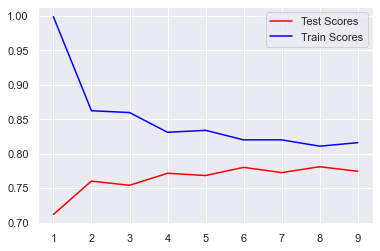

In [131]:
# according to graph, score difference between test and train is smaller.
# So decide k = 8.

plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

In [132]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [133]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [134]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.781042654028436
Accuracy score for train data : 0.8108492482730597


In [135]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[1452,  126],
       [ 336,  196]], dtype=int64)

In [136]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1578
           1       0.61      0.37      0.46       532

    accuracy                           0.78      2110
   macro avg       0.71      0.64      0.66      2110
weighted avg       0.76      0.78      0.76      2110



In [137]:
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

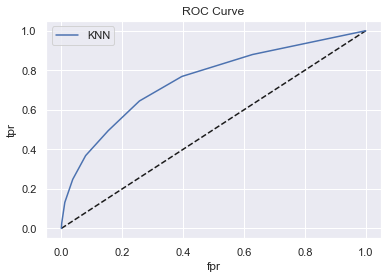

In [138]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [139]:
metrics.roc_auc_score(y_test, y_proba)

0.7486200053365353

In [140]:
metrics.confusion_matrix(y_pred_knn, y_test)

array([[1452,  336],
       [ 126,  196]], dtype=int64)

### Decision Tree

In [141]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [142]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7426540284360189
Accuracy score for train data : 0.9985778138967899


In [143]:
# Because of overfitting issue, using gridsearchcv to find best parameters.

params_dt = {'criterion' : ['entropy', 'gini'], 'min_samples_split' : [2,4,6,8], 'min_samples_leaf' : [2, 3, 5, 7]}



gscv_dt = GridSearchCV(DecisionTreeClassifier(), params_dt, cv = 3, scoring = 'f1')

In [144]:
gscv_dt.fit(X_train_sc, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='f1')

In [145]:
gscv_dt.best_params_

{'criterion': 'gini', 'min_samples_leaf': 7, 'min_samples_split': 8}

In [146]:
dt_gscv =DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 7, min_samples_split = 4)
dt_gscv.fit(X_train_sc, y_train)

y_pred_dt_gscv = dt_gscv.predict(X_test_sc)
y_pred_gscv_train_dt = dt_gscv.predict(X_train_sc)

dt_gscv_as = metrics.accuracy_score(y_test, y_pred_dt_gscv)
dt_gscv_train_as = metrics.accuracy_score(y_train, y_pred_gscv_train_dt)

print(f"Accuracy score for test data : {dt_gscv_as}")
print(f"Accuracy score for train data : {dt_gscv_train_as}")

Accuracy score for test data : 0.7772511848341233
Accuracy score for train data : 0.8697683868346201


### Random Forest

In [147]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [148]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.785781990521327
Accuracy score for train data : 0.9983746444534742


In [149]:
random_forest_ = RandomForestClassifier(100)
random_forest_.fit(X_train, y_train)

y_pred_rf_ = random_forest_.predict(X_test)
y_pred_train_rf_ = random_forest_.predict(X_train)

In [150]:
rf_as_ = metrics.accuracy_score(y_test, y_pred_rf_)
rf_as_train_ = metrics.accuracy_score(y_train, y_pred_train_rf_)

print(f"Accuracy score for test data : {rf_as_}")
print(f"Accuracy score for train data : {rf_as_train_}")

Accuracy score for test data : 0.7881516587677725
Accuracy score for train data : 0.9985778138967899


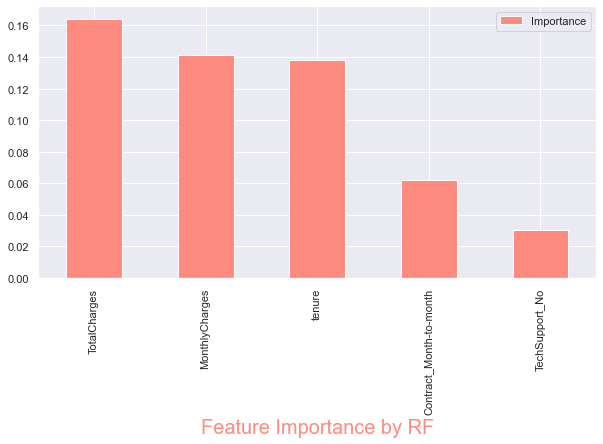

In [151]:
# checking feature importance for random forest classifier /// According to feature importance is 'TotalCharges'

feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#FF8A80', figsize = (10, 5))
plt.xlabel("Feature Importance by RF", color = "#FF8A80", fontdict= {"fontsize" : 20});

In [152]:
X_train_new_ = X_train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']]
X_test_new_ = X_test[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']]

In [153]:
random_forest_new = RandomForestClassifier()
random_forest_new.fit(X_train_new_, y_train)

y_pred_rf_new = random_forest_new.predict(X_test_new_)
y_pred_train_rf_new = random_forest_new.predict(X_train_new_)

In [154]:
# according to new feature, there are no change that much. this have overfitting issue. 


rf_as_new = metrics.accuracy_score(y_test, y_pred_rf_new)
rf_as_train_new = metrics.accuracy_score(y_train, y_pred_train_rf_new)

print(f"Accuracy score for test data : {rf_as_new}")
print(f"Accuracy score for train data : {rf_as_train_new}")

Accuracy score for test data : 0.7767772511848341
Accuracy score for train data : 0.9922795611540024


In [155]:
# Because of overfitting issue, using gridsearchcv to find best parameters.

params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

gscv_rf = GridSearchCV(RandomForestClassifier(), params_grid, cv = 3, scoring = 'f1')


In [156]:
gscv_rf.fit(X_train_sc, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 400, 500]},
             scoring='f1')

In [157]:

gscv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 300}

In [158]:
rf_gscv =RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 8, min_samples_split = 2, min_samples_leaf = 7)
rf_gscv.fit(X_train_sc, y_train)

y_pred_gsvc = rf_gscv.predict(X_test_sc)
y_pred_gsvc_train = rf_gscv.predict(X_train_sc)

rf_gscv_as = metrics.accuracy_score(y_test, y_pred_gsvc)
rf_gscv_train_as = metrics.accuracy_score(y_train, y_pred_gsvc_train)

print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}")

Accuracy score for test data : 0.8037914691943128
Accuracy score for train data : 0.8258837870784234


In [159]:
metrics.confusion_matrix(y_test, y_pred_gsvc)

array([[1429,  149],
       [ 265,  267]], dtype=int64)

In [160]:
metrics.confusion_matrix(y_train, y_pred_gsvc_train)

array([[3287,  298],
       [ 559,  778]], dtype=int64)

### XGBoost

In [161]:
# overfitting problem? no.


xg = XGBClassifier()
xg.fit(X_train_sc, y_train)

y_pred_xg = xg.predict(X_test_sc)

y_pred_xg_train = xg.predict(X_train_sc)

xg_as = metrics.accuracy_score(y_test, y_pred_xg)
xg_as_train = metrics.accuracy_score(y_train, y_pred_xg_train)

print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}")

[15:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of test data : 0.7890995260663507
Accuracy score of train data : 0.9500203169443315


In [162]:
# metrics.plot_roc_curve(xg, X_test_sc, y_test);

In [163]:
parameters = {'learning_rate' : [0.01, 0.03, 0.05], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600]}

In [164]:
xg_grid = GridSearchCV(XGBClassifier(), parameters, cv = 5)

In [165]:
xg_grid.fit(X_train_sc, y_train)

[15:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [166]:
xg_grid.fit

<bound method BaseSearchCV.fit of GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                    

In [167]:
xg_grid.best_score_

0.8021156782633817

In [168]:
xg_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 600}

In [169]:
xg_gridcv =XGBClassifier(learning_rate = .05, max_depth = 1, n_estimators = 400)

xg_gridcv.fit(X_train_sc, y_train)

y_pred_xggrid = xg_gridcv.predict(X_test_sc)
y_pred_xggrid_train = xg_gridcv.predict(X_train_sc)

xg_as_grid = metrics.accuracy_score(y_test, y_pred_xggrid)
xg_as_grid_train = metrics.accuracy_score(y_train, y_pred_xggrid_train)

print(f"Accuracy score of test data : {xg_as_grid}")
print(f"Accuracy score of train data : {xg_as_grid_train}")

[15:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of test data : 0.8061611374407583
Accuracy score of train data : 0.8071921982933766


### GBC

In [170]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train_sc, y_train)

y_pred_grad = grad_boost.predict(X_test_sc)
y_pred_grad_train = grad_boost.predict(X_train_sc)

grad_as = metrics.accuracy_score(y_test, y_pred_grad)
grad_as_train = metrics.accuracy_score(y_train, y_pred_grad_train)

print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}")

Accuracy score of test data : 0.7995260663507109
Accuracy score of train data : 0.8285249898415278


In [171]:
parameters_grad = {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600, 800]}

grad_grid = GridSearchCV(GradientBoostingClassifier(), parameters_grad, cv = 5, scoring = 'f1')



In [ ]:
grad_grid.fit(X_train_sc, y_train)

In [ ]:
grad_grid.best_params_

In [ ]:
grad_grid.best_score_

In [ ]:
# Parameter tunning

grad_grid_ = GradientBoostingClassifier(n_estimators = 600, max_depth = 1, learning_rate = .1)

grad_grid_.fit(X_train_sc, y_train)

y_pred_grad_grid = grad_grid_.predict(X_test_sc)
y_pred_grad_grid_train = grad_grid_.predict(X_train_sc)

grad_grid_as = metrics.accuracy_score(y_test, y_pred_grad_grid)
grad_grid_as_train = metrics.accuracy_score(y_train, y_pred_grad_grid_train)

print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")

### Logistic regression / w

In [ ]:
log_sc = LogisticRegression()
log_sc.fit(X_train_sc, y_train)

y_pred_log_sc = log_sc.predict(X_test_sc)
y_pred_log_sc_ = log_sc.predict(X_train_sc)

log_sc_as = metrics.accuracy_score(y_test, y_pred_log_sc)
log_sc_as_ = metrics.accuracy_score(y_train, y_pred_log_sc_)

print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}")

In [ ]:
metrics.plot_confusion_matrix(log_sc, X_test_sc, y_test, cmap = 'GnBu', display_labels = [0, 1]);

### Result 

In [ ]:
print("Logistic Regression results : \n")
print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}\n")

print("------------------------------------------------")

print("KNN results : \n")
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}\n")

print("------------------------------------------------")

print("SVC result without parameter tunning : \n")
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}\n")
print("SVC results with parameter tunning : \n")
print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}\n")

print("------------------------------------------------")

print("Decision Tree Classifier results with parameter importance : \n")
print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}\n")
print("Decision Tree Classifier results with parameter tunning : \n")
print(f"Accuracy score for test data : {dt_gscv_as}")
print(f"Accuracy score for train data : {dt_gscv_train_as}\n") 


print("------------------------------------------------")

print("Random Forest Classifier without parameter tunning : \n")
print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}\n")
print("Random Forest Classifier with parameter tunning : \n")
print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}\n")

print("------------------------------------------------")

print("XGBoost results without parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}\n")
print("XGBoost results with parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as_grid}")
print(f"Accuracy score of train data : {xg_as_grid_train}\n")

print("------------------------------------------------")

print("Gradient Boosting Classifier results without parameter tunning : \n")
print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}\n")
print("Gradient Boosting Classifier results with parameter tunning : \n")
print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")